# Fit hyper-parameters

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import xcp
from xcp import determine_data_fitting_region,calibration_catalog,metadata_dict,template_amp_phase,advanced_gmvx_plot

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from XCP.
(xcp.core)>> Catalog of calibration runs stored to "xcp.calibration_catalog"
(xcp.core)>> Metadata dictionary for calibration runs stored to "xcp.metadata_dict"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"


## This is notebook is only for scratch code and prototyping

In [59]:
# Load and unpuack physical parameter space
raw_domain = loadtxt('/Users/book/KOALA/PhenomXCP/data/version2/fit_initial_binary_parameters.txt')
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2,chi1_x,chi1_y,chi1_z,chi2_x,chi2_y,chi2_z = raw_domain.T

# Define desired model domain variables and array 
u = cos(theta)
v = sin(theta)
q = eta2q(eta)
model_domain = array( [ u, eta, delta, a1 ] ).T

# Load and unpuack physical parameter space -- dphi
opt_parameter_range = loadtxt('/Users/book/KOALA/PhenomXCP/data/version2/fit_opt_parameters.txt')
mu1, mu2, mu3, nu4, nu5, nu6, zeta1, zeta2 = opt_parameter_range.T


In [60]:
?spline_antidiff

Signature: spline_antidiff(t, y, k=3, n=1)
Docstring: Wrapper for InterpolatedUnivariateSpline antiderivative function
File:      ~/JOKI/Libs/KOALA/positive_dev/positive/maths.py
Type:      function


In [61]:
a1 = array( [ round(k,2) for k in a1 ] )

In [62]:
arange(0.2,1,0.2)

array([0.2, 0.4, 0.6, 0.8])

[[<matplotlib.lines.Line2D at 0x1a1bbc3a90>],

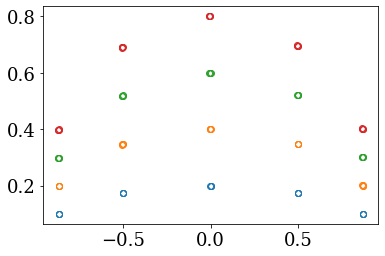

In [63]:
[ plot( u[a1==A1], chi_p[a1==A1], marker='o', ls='none', mfc='none' ) for A1 in (0.2, 0.4, 0.6, 0.8) ]

In [64]:
# Collect set of unique angle values
reference_theta = array([30,60,90,120,150])
degree_point = array([ reference_theta[ argmin( abs(reference_theta-d) ) ] for d in theta*180/pi ])
theta_point = degree_point*pi/180
theta_set = array(sort(list( set(theta_point) )))

In [65]:
# Collect set of unique a1 values
a1_point = around(a1,2)
a1_set = array(sort(list( set(a1_point) )))

# Collect set of unique angle values
degree_point = (around( (theta*180/pi)/10 )*10).astype(int)
theta_point = degree_point*pi/180
theta_set = array(sort(list( set(theta_point) )))

# Collect set of unique mass-ratio values
q_point = around(array([eta2q(n) for n in eta]),2)
q_set = array(sort(list( set(q_point) )))

# Collect set of unique eta values
eta_point = q2eta( q_point )
eta_set = q2eta(q_set)

In [66]:
q_set

array([1., 2., 4., 8.])

In [67]:
eta_set

array([0.25      , 0.22222222, 0.16      , 0.09876543])

In [68]:
degree_point

array([120, 120, 150, 150, 150, 150, 120, 120,  90,  90,  60,  60,  30,
        30,  30,  30,  60,  60,  90,  90,  90, 120, 150, 150, 120,  90,
        60,  30,  30,  60,  90, 120, 150, 150, 120,  90,  60,  30,  30,
        60,  90, 120, 150, 150, 120,  90,  60,  30,  30,  60,  90, 120,
       150, 150, 120,  90,  60,  30,  30,  60,  60,  60,  30,  30,  30,
        30,  60,  60,  90,  90, 120, 120, 150, 150, 150, 150, 120, 120,
        90,  90])

In [69]:
array(sort(list(set(degree_point))))

array([ 30,  60,  90, 120, 150])

In [70]:
theta_set

array([0.52359878, 1.04719755, 1.57079633, 2.0943951 , 2.61799388])

(gmvpfit)>> Now working deg = 4

############################################
# Applying a Positive Greedy Algorithm
############################################


Iteration #1 (Positive Greedy)
------------------------------------
>> The current estimator value is 0.937185
>> 0113 was added to the boundary
>> This caused the estimator value to change by -inf
>> The current boundary is ['0113']

Iteration #2 (Positive Greedy)
------------------------------------
>> The current estimator value is 0.895916
>> 011 was added to the boundary
>> This caused the estimator value to change by -0.041269
>> The current boundary is ['0113', '011']


/Users/book/opt/anaconda2/envs/hack-phenomx3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/book/opt/anaconda2/envs/hack-phenomx3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1314: RuntimeWarning: invalid value encountered in true_divide
  phares = ( sunwrap(angle(fit_range)) - sunwrap(angle(this.range)) ) / sunwrap(angle(this.range))
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1314: RuntimeWarning: divide by zero encountered in true_divide
  phares = ( sunwrap(angle(fit_range)) - sunwrap(angle(this.range)) ) / sunwrap(angle(this.range))



Iteration #3 (Positive Greedy)
------------------------------------
>> The current estimator value is 0.860274
>> 0133 was added to the boundary
>> This caused the estimator value to change by -0.035642
>> The current boundary is ['0113', '011', '0133']

Iteration #4 (Positive Greedy)
------------------------------------
>> The current estimator value is 0.826742
>> 01 was added to the boundary
>> This caused the estimator value to change by -0.033532
>> The current boundary is ['0113', '011', '0133', '01']

Iteration #5 (Positive Greedy)
------------------------------------
>> The current estimator value is 0.807411
>> 3 was added to the boundary
>> This caused the estimator value to change by -0.019331
>> The current boundary is ['0113', '011', '0133', '01', '3']

Iteration #6 (Positive Greedy)
------------------------------------
>> The current estimator value is 0.797450
>> 11 was added to the boundary
>> This caused the estimator value to change by -0.009962
>> The current bounda

/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1828: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  subplot( spdim+'1' )
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1882: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = ax_array[0] if use_external_axes else subplot(spdim+'1',projection='3d')
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1882: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = ax_array[0] if use_external_axes els

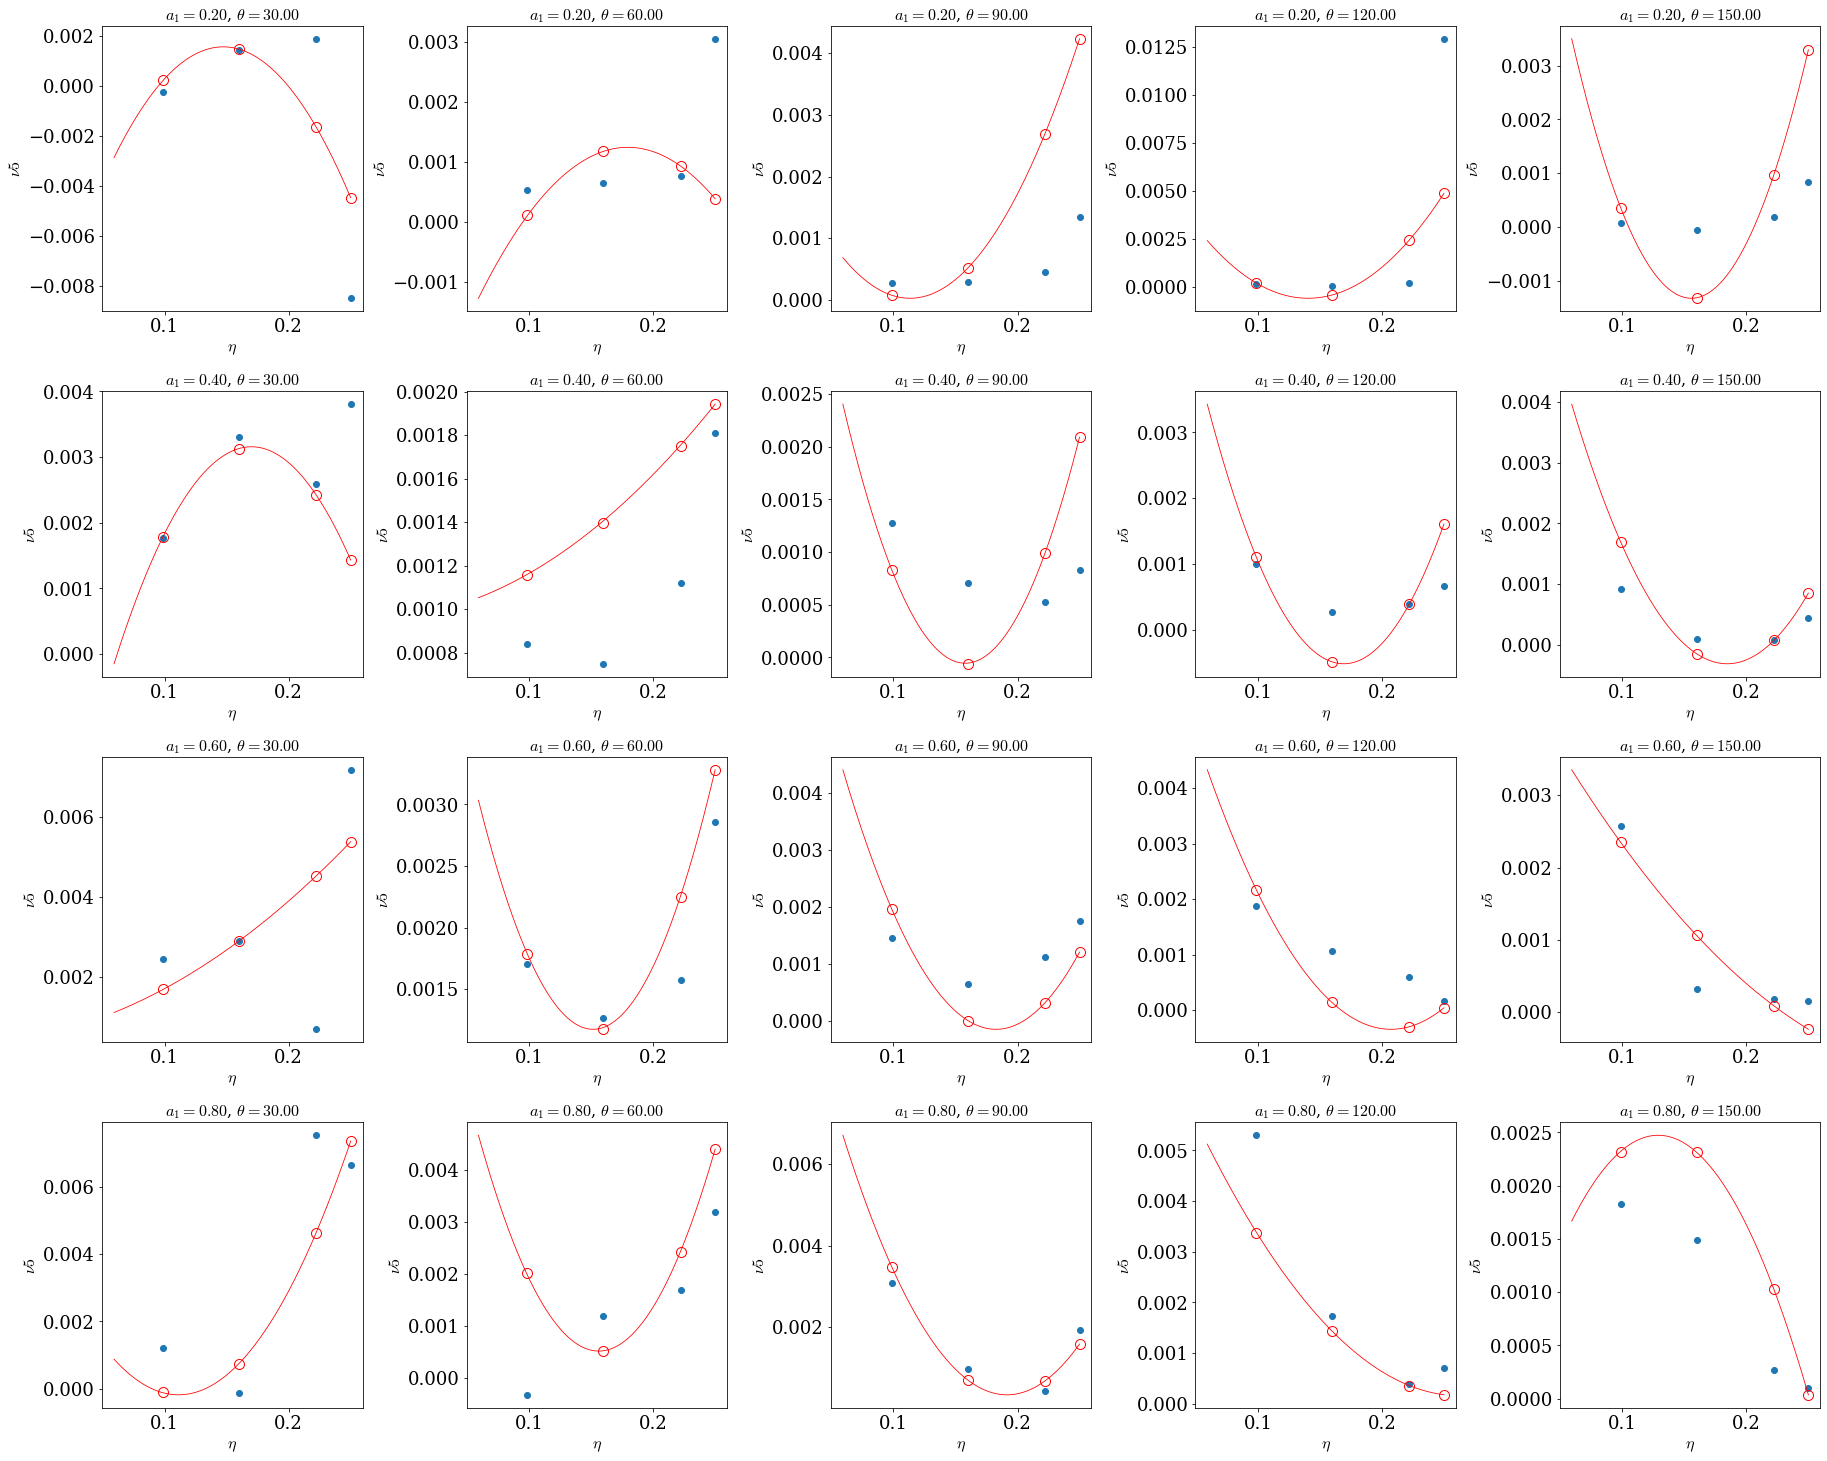

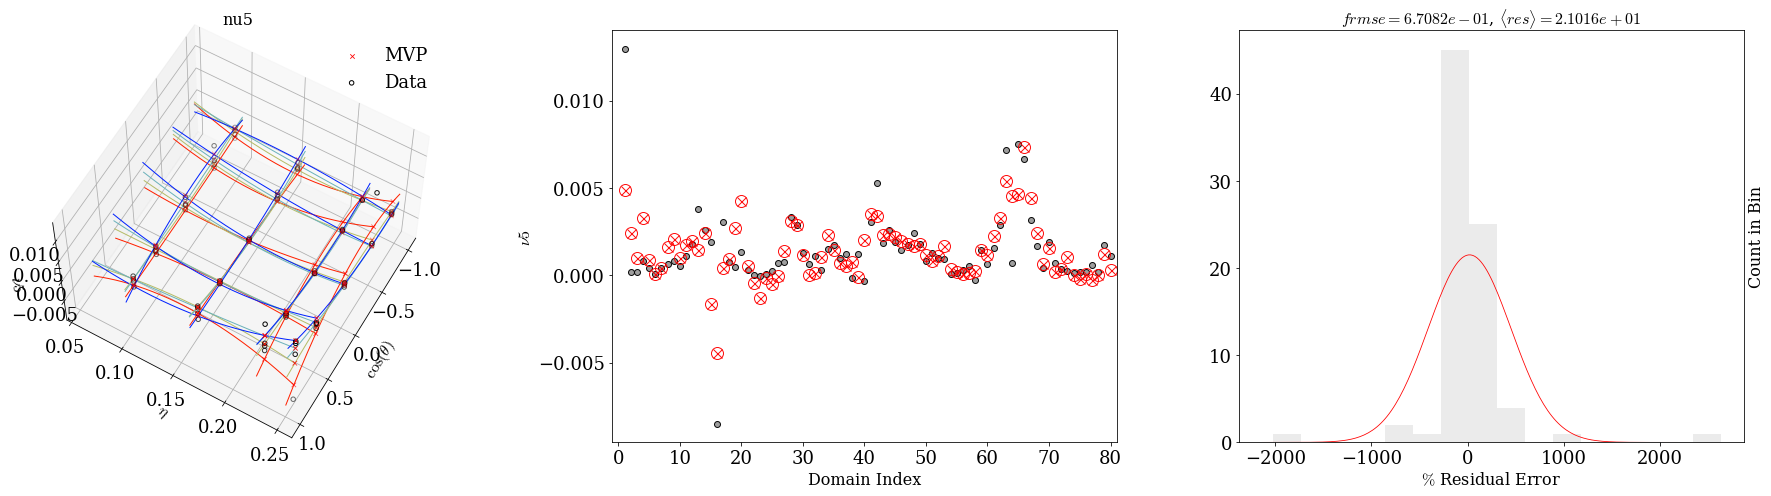

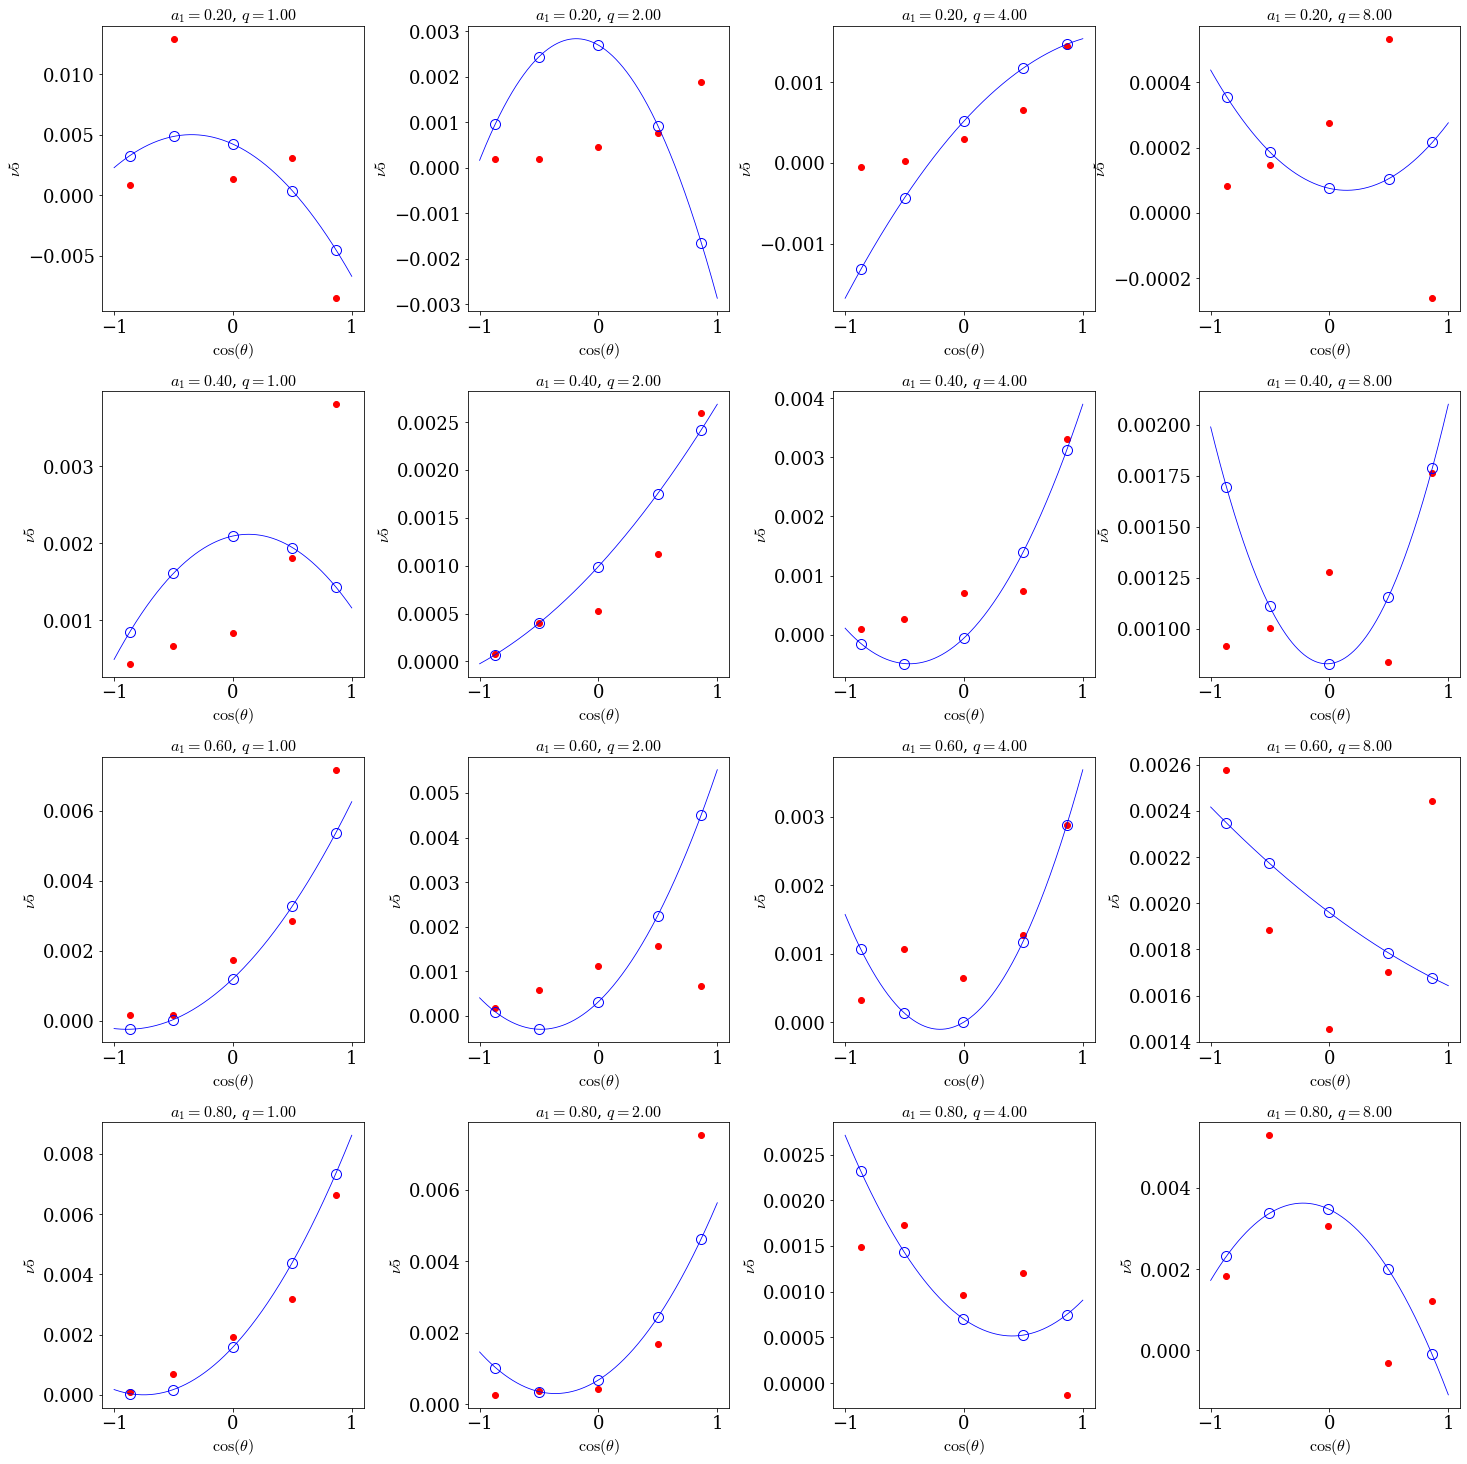

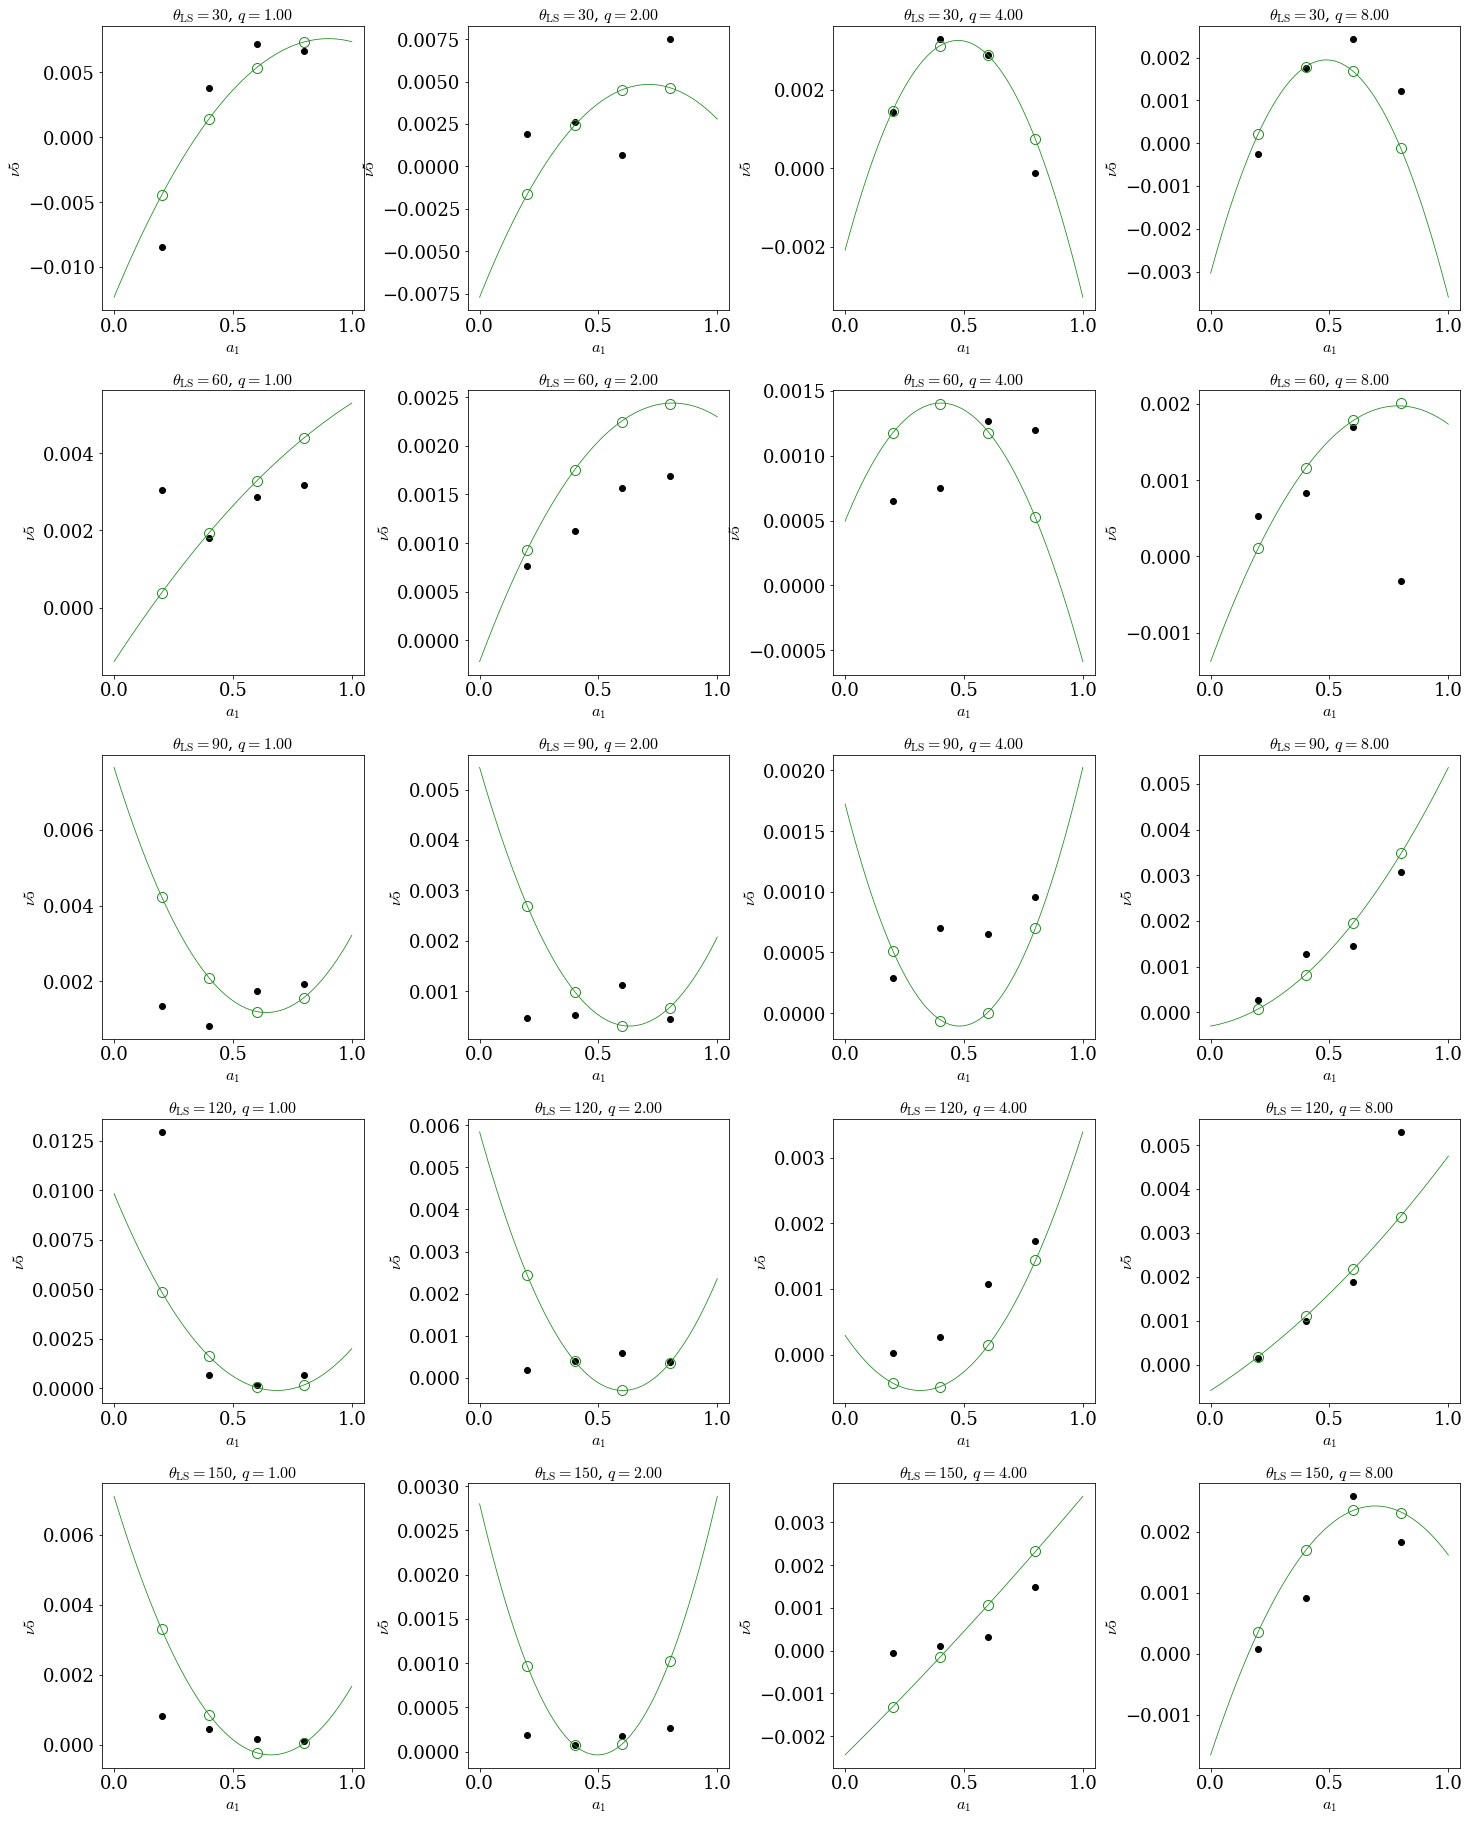

In [75]:

# version 1: u, eta, chi_eff, chi_p
# syntax: 
# nu5, mu2

# version 2: u, eta, a1
# syntax: gmvpfit( trial_model_domain, mu1,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# nu4, nu6, mu1, mu3, mu4 

'''
* use mvr for nu5, mu2, mu4
'''

#
foo = {}

# # nu4
# # ---
# key = 'nu4'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, -nu4,fitatol=0.0001,verbose=True,maxdeg_list=[4,2,0,2],center=True,labels=labels,estatol=0.0015,temper=False)
# advanced_gmvx_plot(foo[key]); show();

# nu5
# ---
key = 'nu5'
labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
foo[key] = gmvpfit( model_domain, nu5,fitatol=0.00001,verbose=True,maxdeg_list=[2,2,0,2],center=False,labels=labels,estatol=0.0005,temper=not True)
advanced_gmvx_plot(foo[key]); show();

# # nu6
# # ---
# key = 'nu6'
# weights = None
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, nu6,fitatol=0.0001,verbose=True,maxdeg_list=[3,2,0,2],center=True,labels=labels,estatol=0.005,temper=False,weights=weights)
# advanced_gmvx_plot(foo[key]); show();

# # zeta1
# # ---
# key = 'zeta1'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, zeta1,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,3],center=True,labels=labels,estatol=0.05)
# advanced_gmvx_plot(foo[key]); show();

# # zeta2
# # ---
# key = 'zeta2'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, zeta2,fitatol=0.0001,verbose=True,maxdeg_list=[4,0,3,3],center=True,labels=labels,estatol=0.05)
# advanced_gmvx_plot(foo[key]); show();

# # mu1 
# # ---
# key = 'mu1'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu1,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,3],center=True,labels=labels,estatol=0.01)
# alert( 'The fit has '+bold(str(len(foo[key].basis_symbols)))+' terms.', header=True )
# advanced_gmvx_plot(foo[key]); show();

# # mu2 
# # ---
# key = 'mu2'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu2,fitatol=0.001,verbose=True,maxdeg_list=[4,3,0,3],center=True,labels=labels,estatol=0.01)
# alert( 'The fit has '+bold(str(len(foo[key].basis_symbols)))+' terms.', header=True )
# advanced_gmvx_plot(foo[key]); show();

# # mu3  --- SUSPECT
# # ---
# key = 'mu3'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu3,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,1],center=True,estatol=0.005,labels=labels)
# advanced_gmvx_plot(foo[key]); show();



In [40]:
diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [18]:
shape(weights*nu6)

(80,)